### Data Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import file
train_df = pd.read_csv(r"C:\Users\aayus\Desktop\Secrets-of-the-Universe\spaceship-titanic\data\train.csv")

In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_df.shape

(8693, 14)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


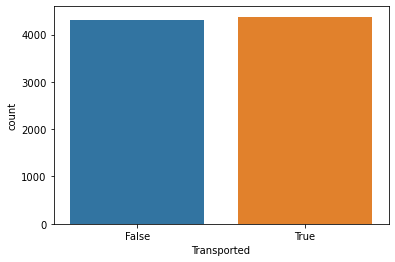

In [8]:
sns.countplot('Transported', data=train_df)

In [9]:
passenger_groups = train_df['PassengerId'].apply(lambda x: int((str(x).split("_"))[0]))

In [10]:
print(f"Total number of groups: {len(passenger_groups.unique())}")

Total number of groups: 6217


In [11]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [12]:
train_df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

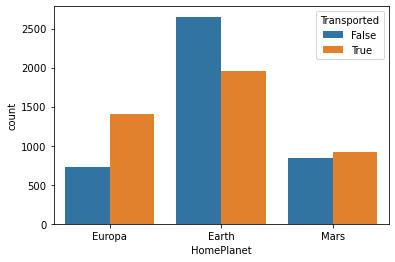

In [13]:
sns.countplot(x='HomePlanet', data=train_df, hue='Transported')

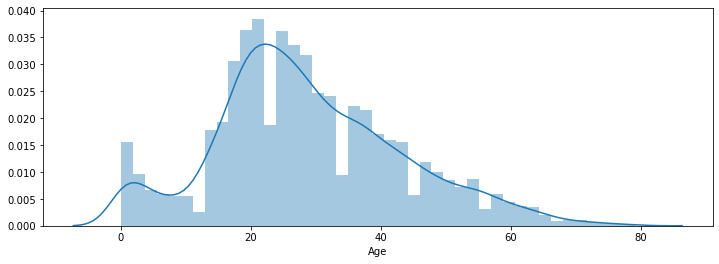

In [14]:
plt.figure(figsize=(12,4))
sns.distplot(train_df['Age'])

In [15]:
sorted(train_df['Age'].unique())[0]

0.0

In [16]:
train_df[train_df['HomePlanet'].isna()].isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         2
Cabin             6
Destination       4
Age               2
VIP               3
RoomService       6
FoodCourt         2
ShoppingMall      7
Spa               3
VRDeck            1
Name              7
Transported       0
dtype: int64

In [17]:
missing_home_p_df = train_df[train_df['HomePlanet'].isna()]

In [18]:
missing_home_p_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False


In [19]:
def check_relationship(df, column_to_check):
    results = []
    df_not_na = df[pd.notna(df[column_to_check])].copy()
    df_not_na.loc[:, 'Last_Name'] = df_not_na['Name'].apply(lambda x: str(x).strip().split()[-1])
    grouped = df_not_na.groupby('Last_Name')
    for last_name, group in grouped:
        if len(group) > 1:
            list_of_values = group[column_to_check].to_list()
            unique_values = set(list_of_values)
            if len(unique_values) == 1:
                results.append((last_name, 'Same'))
            else:
                results.append((last_name, 'Different'))
    df_not_na = df_not_na.drop(columns=['Last_Name'])
    return pd.DataFrame(results, columns=['Last_Name', 'Relationship'])

In [20]:
results_df = check_relationship(train_df, 'HomePlanet')

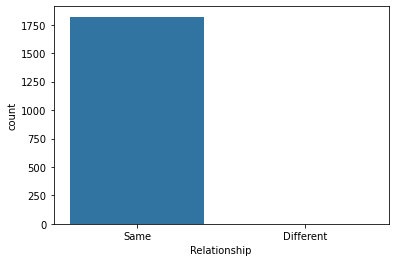

In [22]:
sns.countplot(x='Relationship', data=results_df)

In [23]:
results_df1 = check_relationship(train_df, 'Destination')

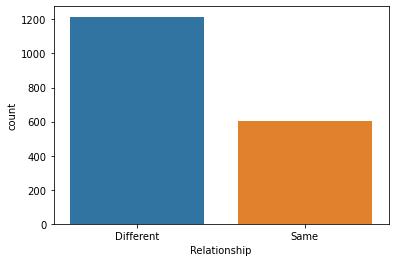

In [24]:
sns.countplot(x='Relationship', data=results_df1)

In [25]:
results_df1

,Last_Name,Relationship
0,Acobson,Different
1,Acobsond,Same
2,Adavisons,Different
3,Adkinson,Different
4,Admingried,Different
...,...,...
1815,Yanton,Different
1816,Yatters,Different
1817,Yorkland,Different
1818,Youngrayes,Same


In [29]:
train_df[train_df['Name'].str.contains('Yorkland', na=False)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
83,0091_01,Earth,True,G/16/S,TRAPPIST-1e,26.0,False,NaN,0.0,0.0,0.0,0.0,Deanne Yorkland,True
84,0091_02,Earth,False,F/20/S,TRAPPIST-1e,27.0,False,1.0,697.0,31.0,188.0,0.0,Tinez Yorkland,False
427,0461_01,Earth,False,E/27/S,PSO J318.5-22,31.0,False,0.0,869.0,0.0,0.0,0.0,Shany Yorkland,True
428,0461_02,Earth,False,F/85/S,TRAPPIST-1e,22.0,False,0.0,70.0,182.0,612.0,20.0,Warry Yorkland,True
429,0461_03,Earth,False,G/66/S,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,Len Yorkland,True
594,0618_01,Earth,False,G/95/P,55 Cancri e,21.0,False,0.0,0.0,908.0,49.0,0.0,Philda Yorkland,True
595,0618_02,Earth,False,F/131/P,PSO J318.5-22,21.0,False,1.0,368.0,0.0,0.0,388.0,Troyce Yorkland,False
2764,2972_01,Earth,False,E/182/P,TRAPPIST-1e,14.0,False,0.0,1.0,1441.0,0.0,190.0,Danna Yorkland,True
3088,3328_01,Earth,False,F/691/P,TRAPPIST-1e,34.0,False,578.0,0.0,0.0,0.0,323.0,Rena Yorkland,False
4920,5247_01,Earth,False,G/848/P,TRAPPIST-1e,38.0,False,6.0,2324.0,0.0,0.0,0.0,Roydo Yorkland,True


In [30]:
results_df2 = check_relationship(train_df, 'CryoSleep')

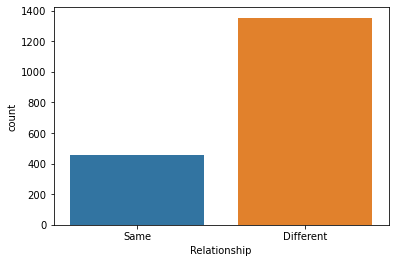

In [32]:
sns.countplot(x='Relationship', data=results_df2)

In [31]:
results_df3 = check_relationship(train_df, 'VIP')

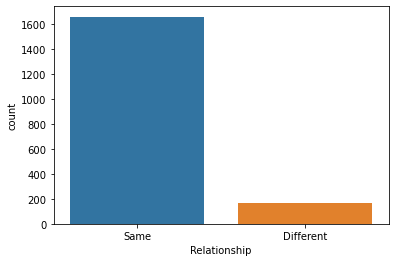

In [33]:
sns.countplot(x='Relationship', data=results_df3)

In [37]:
results_df3[results_df3['Relationship'] == 'Different']

,Last_Name,Relationship
11,Alaring,Different
22,Aloubtled,Different
28,Amincrerus,Different
31,Ancy,Different
43,Apie,Different
...,...,...
1751,Wate,Different
1758,Watuald,Different
1776,Wheededly,Different
1797,Winie,Different


In [39]:
train_df[train_df['Name'].str.contains('Alaring', na=False)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1938,2074_01,Europa,False,D/69/S,TRAPPIST-1e,24.0,False,1289.0,3343.0,0.0,4996.0,729.0,Sadir Alaring,False
1939,2074_02,Europa,False,D/69/S,TRAPPIST-1e,23.0,False,9.0,4081.0,0.0,0.0,16.0,Mergas Alaring,True
2196,2348_01,Europa,False,D/78/S,55 Cancri e,44.0,True,0.0,1223.0,78.0,1418.0,1239.0,Asellux Alaring,False
2809,3030_01,Europa,False,B/97/P,55 Cancri e,30.0,False,728.0,2551.0,0.0,48.0,1804.0,Cellum Alaring,True
2810,3030_02,Europa,True,B/97/P,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Wezena Alaring,True
8178,8741_01,Europa,True,A/91/P,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Neutrak Alaring,True
8179,8741_02,Europa,False,A/91/P,55 Cancri e,49.0,False,0.0,3853.0,0.0,245.0,178.0,Grasath Alaring,True


In [45]:
def fill_home_planet(df):
    indexes = df[df['HomePlanet'].isna()].index
    df_notna = df[pd.notna(df['HomePlanet'])]
    for index in indexes:
        name = df['Name'][index]
        if isinstance(name, str):
            last_name = str(name).split()[-1]
            indexes_2 = df_notna[df_notna['Name'].str.contains(last_name, case=False, na=False)].index
            if len(indexes_2) > 0:
                df.loc[index, 'HomePlanet'] = df_notna['HomePlanet'][indexes_2[0]]
    return df

In [46]:
train_df = fill_home_planet(train_df)

In [48]:
train_df.isnull().sum()

PassengerId       0
HomePlanet       14
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [50]:
cryosleep_people = train_df[train_df['CryoSleep'] == True]